In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [25]:
files = [file for file in os.listdir('./oneminutesab22')]

abril = pd.DataFrame()
for file in files:
  df = pd.read_csv('./oneminutesab22/'+file)
  abril = pd.concat([abril, df])

In [26]:
abril.head()

,TOA5,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X,31786,OneMinute
0,TIMESTAMP,RECORD,Irradiance_Avg,T_amb_Avg,RH_Avg,P_atm_Avg,NaN,NaN
1,TS,RN,W/m^2,Deg C,%,mbar,NaN,NaN
2,NaN,NaN,Avg,Avg,Avg,Avg,NaN,NaN
3,2022-05-10 00:00:00,319127,0,18.57,45.2,754.3611,NaN,NaN
4,2022-05-10 00:01:00,319128,0,18.56,45.27,754.359,NaN,NaN


# Arreglando la tabla

In [27]:
abril.drop(abril.index[0:3], axis = 0, inplace = True)
abril.drop(['OneMinute', '31786'],axis='columns', inplace=True)

# Convirtiendolo a float

In [28]:
abril = abril.astype({'CR1000X': float, '8543.1':float, 'CR1000X.Std.05.01':float, 'CPU:Est_meteo1.CR1X':float,'8543':float})

# Sacando promedios

In [29]:
prom_rad = abril['CR1000X'].mean()
prom_Tamb = abril['8543.1'].mean()
prom_atm = abril['CPU:Est_meteo1.CR1X'].mean()
proms_abril = [prom_rad, prom_Tamb,prom_atm]
abril.describe()

,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X
count,44640.000000,44640.000000,44640.000000,44640.000000,44640.000000
mean,328486.500000,301.324013,19.599618,36.746451,752.787068
std,12886.602345,387.233815,3.771394,17.232635,1.840991
min,306167.000000,0.000000,11.430000,2.678000,746.667300
25%,317326.750000,0.000000,16.610000,23.670000,751.542175
50%,328486.500000,23.330000,19.125000,34.770000,752.982950
75%,339646.250000,655.000000,22.800000,46.772500,754.105550
max,350806.000000,1451.000000,28.380000,92.300000,757.963800


In [30]:
abril.to_csv('abril22.csv', index=False)
mes = 'Abril'
anio = '2022'

# Radiación abril

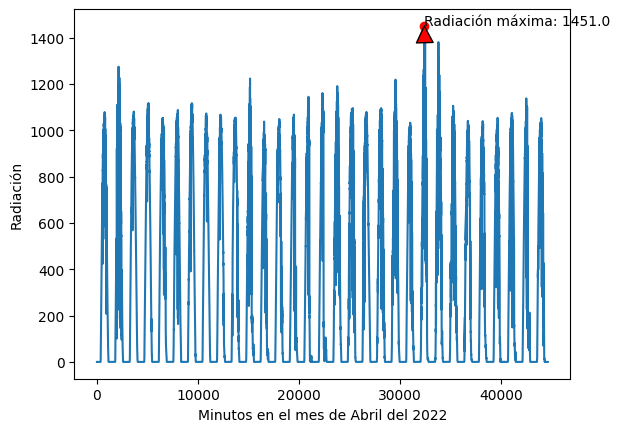

In [31]:
df = pd.read_csv("abril22.csv")

plt.plot(df.index, df['CR1000X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Radiación')
max_value = df['CR1000X'].max()
max_index = df['CR1000X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Radiación máxima: '+str(max_value), xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Temperatura Ambiente abril

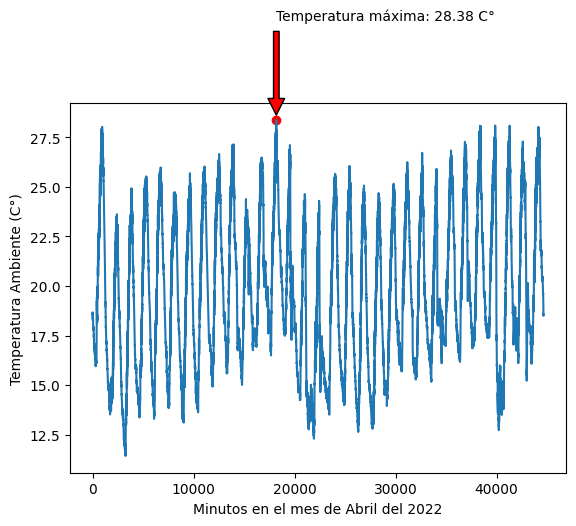

In [32]:

plt.plot(df.index, df['8543.1'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Temperatura Ambiente (C°)')
max_value = df['8543.1'].max()
max_index = df['8543.1'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Temperatura máxima: '+str(max_value)+ ' C°', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Presion abril

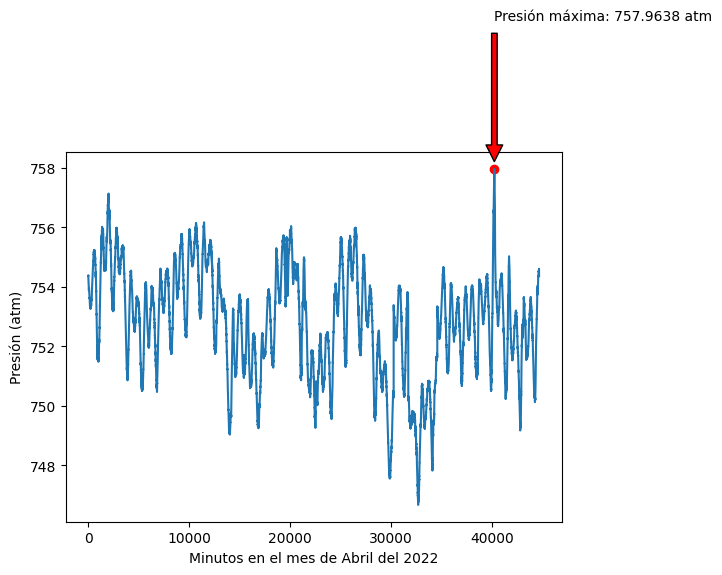

In [33]:

plt.plot(df.index, df['CPU:Est_meteo1.CR1X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Presión (atm)')
max_value = df['CPU:Est_meteo1.CR1X'].max()
max_index = df['CPU:Est_meteo1.CR1X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Temperatura máxima')
plt.annotate('Presión máxima: '+str(max_value) + ' atm', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()